# Introduction

In this notebook, we will attempt to create a model that performs well on the sonar dataset.

We will first attempt to use Manifold Learning to reduce the number of dimensions in each sample before using various classification techniques. After that, we will attempt to use MLP (Multi-Layer Perceptrons) to create a Neural Network to classify the samples.

# Processing the Dataset

We will first import pandas to handle the datasets.

In [4]:
import pandas as pd

We will import the testing and training datasets independently, as they are stored in separate files.

In [5]:
train = pd.read_csv('data/sonar_train.csv')
test = pd.read_csv('data/sonar_test.csv')

In [6]:
train

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M51,M52,M53,M54,M55,M56,M57,M58,M59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.0096,0.0404,0.0682,0.0688,0.0887,0.0932,0.0955,0.2140,0.2546,0.2952,...,0.0237,0.0078,0.0144,0.0170,0.0012,0.0109,0.0036,0.0043,0.0018,M
184,0.0269,0.0383,0.0505,0.0707,0.1313,0.2103,0.2263,0.2524,0.3595,0.5915,...,0.0167,0.0199,0.0145,0.0081,0.0045,0.0043,0.0027,0.0055,0.0057,M
185,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,M
186,0.0209,0.0191,0.0411,0.0321,0.0698,0.1579,0.1438,0.1402,0.3048,0.3914,...,0.0078,0.0201,0.0104,0.0039,0.0031,0.0062,0.0087,0.0070,0.0042,M


*sonar training dataset*

The sonar dataset takes 60 measurements and labels each sample either R or M for Rock and Mine respectively. We want to create a model that can accurately label a sample R or M.

As we can see from train, each sample has 60 features (each measurement M, from 0 to 59) and 1 target (Class, R or M).

In [77]:
print('Train Size:',train.shape)
print('Test Size:',test.shape)
print('Total Dataset Size:',len(train)+len(test))
print('Test ratio:',test.size/(train.size+test.size))

Train Size: (188, 61)
Test Size: (40, 61)
Total Dataset Size: 228
Test ratio: 0.17543859649122806


By using pandas' shape property, we can see the size of each dataset, which shows that the test dataset has the same structure as the train dataset. We can also take a ratio of each dataset's length, showing a 83-17 test-train split; the ratio is fine due to the relatively small size of the dataset (228 samples).

In [6]:
labels = ['Rock','Mine']

def defineClass(label):
    return 1 if label == 'M' else 0

This problem is a binary classification problem because each object can only belong to one class; we can create a label array and create a function to change the text label to a number representing the labels array position.

In [7]:
train.columns.to_list()

['M0',
 ' M1',
 ' M2',
 ' M3',
 ' M4',
 ' M5',
 ' M6',
 ' M7',
 ' M8',
 ' M9',
 ' M10',
 ' M11',
 ' M12',
 ' M13',
 ' M14',
 ' M15',
 ' M16',
 ' M17',
 ' M18',
 ' M19',
 ' M20',
 ' M21',
 ' M22',
 ' M23',
 ' M24',
 ' M25',
 ' M26',
 ' M27',
 ' M28',
 ' M29',
 ' M30',
 ' M31',
 ' M32',
 ' M33',
 ' M34',
 ' M35',
 ' M36',
 ' M37',
 ' M38',
 ' M39',
 ' M40',
 ' M41',
 ' M42',
 ' M43',
 ' M44',
 ' M45',
 ' M46',
 ' M47',
 ' M48',
 ' M49',
 ' M50',
 ' M51',
 ' M52',
 ' M53',
 ' M54',
 ' M55',
 ' M56',
 ' M57',
 ' M58',
 ' M59',
 ' Class']

Getting a list of the column names shows that the target column is irregularly named.

In [8]:
train = train.rename(columns={' Class':'class'})
test = test.rename(columns={' Class':'class'})

Using the rename function, we rename the ' Class' field to 'class', which is easier to type.

In [9]:
train["class"] = train["class"].apply(defineClass)
test["class"] = test["class"].apply(defineClass)

We use pandas' apply function to convert the string labels to numbers.

In [10]:
trainX, trainY = train.drop('class', axis = 1), train['class']
testX, testY = test.drop('class', axis = 1), test['class']

We create the X (features) and y (target) for each dataset by splitting the target variable from the features. X will contain every column except 'class'; y will contain only 'class'.

In [11]:
trainX

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.0096,0.0404,0.0682,0.0688,0.0887,0.0932,0.0955,0.2140,0.2546,0.2952,...,0.0310,0.0237,0.0078,0.0144,0.0170,0.0012,0.0109,0.0036,0.0043,0.0018
184,0.0269,0.0383,0.0505,0.0707,0.1313,0.2103,0.2263,0.2524,0.3595,0.5915,...,0.0346,0.0167,0.0199,0.0145,0.0081,0.0045,0.0043,0.0027,0.0055,0.0057
185,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0329,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058
186,0.0209,0.0191,0.0411,0.0321,0.0698,0.1579,0.1438,0.1402,0.3048,0.3914,...,0.0054,0.0078,0.0201,0.0104,0.0039,0.0031,0.0062,0.0087,0.0070,0.0042


*trainX (features of the training set)*

In [12]:
trainY

0      0
1      0
2      0
3      0
4      0
      ..
183    1
184    1
185    1
186    1
187    1
Name: class, Length: 188, dtype: int64

*trainY (target of the training set)*

# Manifold Learning

Manifold Learning attempts to reduce the number of dimensions of a sample to represent it in 2D or 3D space. In the case of the sonar dataset, we visualise each measurement as a point on a axis, so that each sample is likened to a 60-dimensional object.

We are hoping to visualise each sample of the sonar dataset in 2D space, where it will be easy to use other classification techniques to classify samples.

To use manifold learning, we will import sklearn.manifold to give us access to the necessary functions.

In [13]:
import sklearn.manifold as man

### t-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) is a commonly used tool in dimensionality reduction, as it tends to be versatile. It takes into account the local structure of the data and each sample's neighbours.

To get the coordinate points, we will use fit_transform to return the points. By not passing any arguments, we will get a 2D coordinate generated over 1000 iterations where each sample's 30 nearest neighbours are considered.

In [37]:
embeddedTrainX = man.TSNE().fit_transform(trainX)

In [38]:
embeddedTrainX

array([[ -8.316671  ,  -0.48230988],
       [ 13.684673  ,  -8.060301  ],
       [ 11.381838  ,  -8.393073  ],
       [-12.01702   ,   2.3182523 ],
       [  4.319225  ,   3.7253444 ],
       [ 13.115477  ,  -8.448119  ],
       [  1.4280791 ,  -4.9702797 ],
       [  3.6379008 ,  -0.15849817],
       [  2.6165698 ,   1.7494293 ],
       [ -0.23602965,   2.1652284 ],
       [ -6.052469  ,   5.066014  ],
       [  2.1248758 ,   1.9298629 ],
       [  7.0206594 ,  -8.791486  ],
       [ -3.7730682 ,  -0.5190058 ],
       [ -2.3947768 ,  -0.8756117 ],
       [ -9.592898  ,   0.76645476],
       [-10.70601   ,   3.603612  ],
       [  4.6325502 ,  -8.566148  ],
       [ -7.4930453 ,   2.580605  ],
       [ 13.500176  ,  -5.554401  ],
       [ -1.4463048 ,  -7.4591284 ],
       [-13.643033  ,   4.334731  ],
       [-12.990523  ,   3.8742085 ],
       [ -7.1527023 ,   4.9632516 ],
       [-12.67359   ,   6.5804615 ],
       [ -6.3370595 ,   6.088741  ],
       [  7.4774766 ,  -5.0932846 ],
 

*embeddedTrainX (2D plot point for each sample in trainX)*

In [44]:
g = embeddedTrainX
g.transpose()

array([[ -8.316671  ,  13.684673  ,  11.381838  , -12.01702   ,
          4.319225  ,  13.115477  ,   1.4280791 ,   3.6379008 ,
          2.6165698 ,  -0.23602965,  -6.052469  ,   2.1248758 ,
          7.0206594 ,  -3.7730682 ,  -2.3947768 ,  -9.592898  ,
        -10.70601   ,   4.6325502 ,  -7.4930453 ,  13.500176  ,
         -1.4463048 , -13.643033  , -12.990523  ,  -7.1527023 ,
        -12.67359   ,  -6.3370595 ,   7.4774766 ,   5.827631  ,
          6.371066  ,   4.2458677 ,   0.25432748,   1.4059824 ,
          4.287352  ,  -0.90526545,   9.435003  ,   1.0611099 ,
         -6.0736237 ,  -4.999387  ,  -4.329152  ,  -5.579804  ,
         -4.911997  ,  -6.7743497 ,  -8.504544  ,  -8.664159  ,
        -12.671713  ,   1.6692446 ,   2.6791303 ,  -4.752048  ,
         -3.684224  ,  -3.7451243 , -11.17083   ,  -3.0523605 ,
          0.21302003,  -0.81958854,  -1.2005551 ,  -1.0178717 ,
         -0.6188705 ,  -6.1040974 ,  -5.1198034 ,  -4.4559283 ,
         -4.73587   ,  -4.60212   ,  -5.

Using numpy's transpose function, we can convert the array for each point into an array for each axis so that we can plot the results.

In [19]:
import matplotlib.pyplot as plt

We import matplotlib to allow us to display a plot. We will use trainY to determine the colourmappings as it represents the label for each sample.

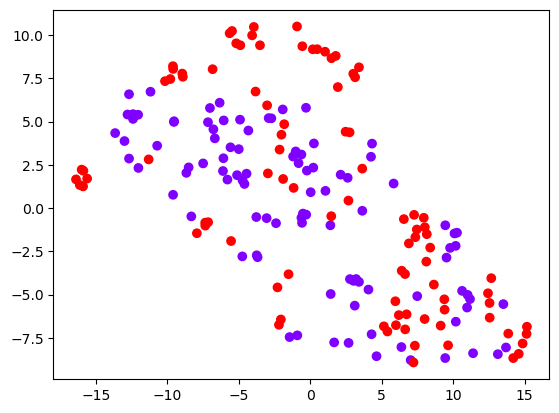

In [52]:
embeddedTrainXX,embeddedTrainXY = embeddedTrainX.transpose()

plt.scatter(embeddedTrainXX, embeddedTrainXY, c = trainY, cmap = 'rainbow')
plt.show()

Plotting the results on a graph shows no clear separation between R and M.

In [21]:
def embed(X, y, args = {}):
    model = man.TSNE(**args)
    embedX, embedY = model.fit_transform(X).transpose()
    
    plt.scatter(embedX, embedY, c = trainY, cmap = 'rainbow')
    plt.title(f'Sonar_train dataset reduced to 2D with t-SNE')
    plt.show()

The embed function will allow us to test multiple parameters and plot them. We will begin by changing perplexity (neighbours considered).

{'perplexity': 2}


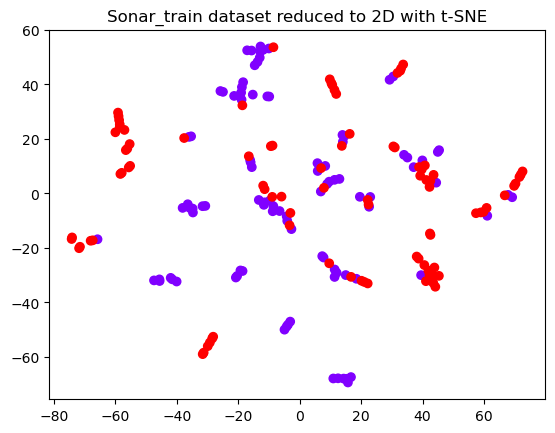

{'perplexity': 3}


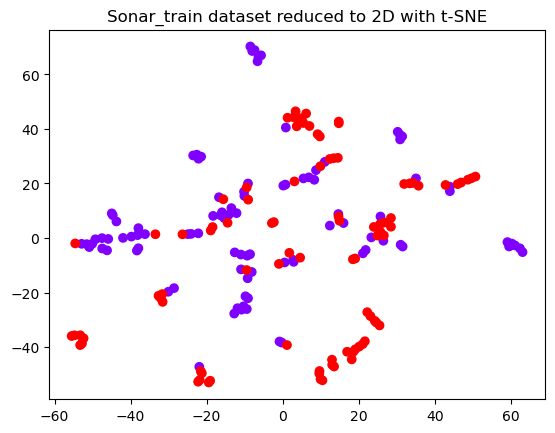

{'perplexity': 5}


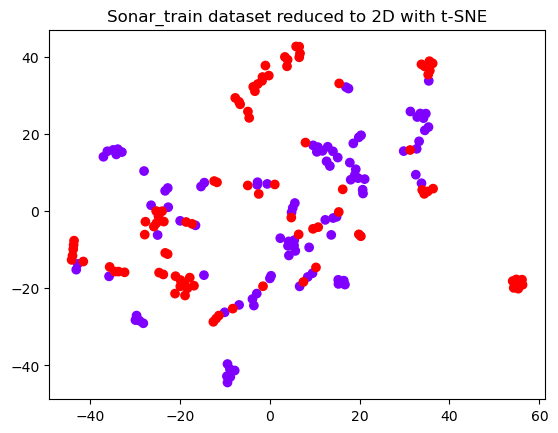

{'perplexity': 10}


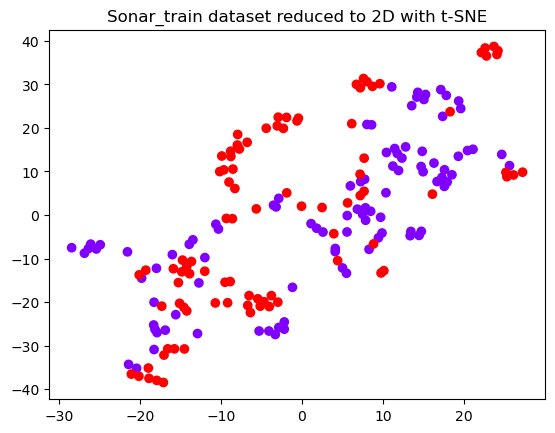

{'perplexity': 15}


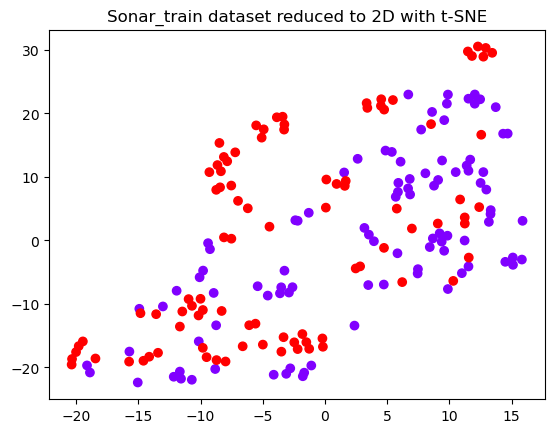

{'perplexity': 20}


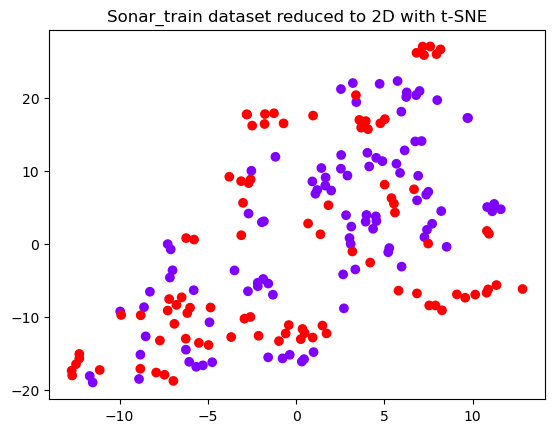

{'perplexity': 25}


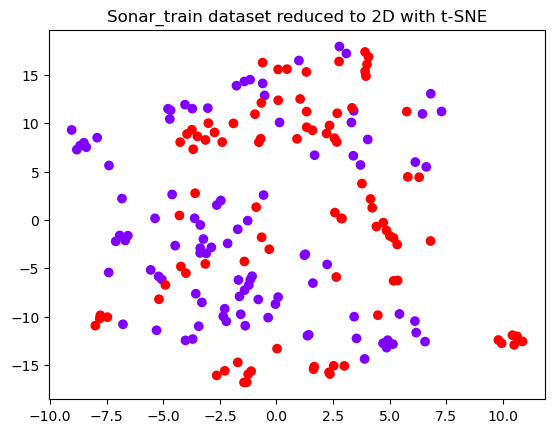

{'perplexity': 30}


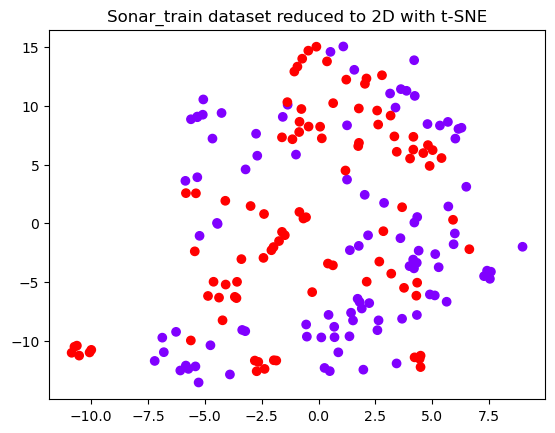

{'perplexity': 50}


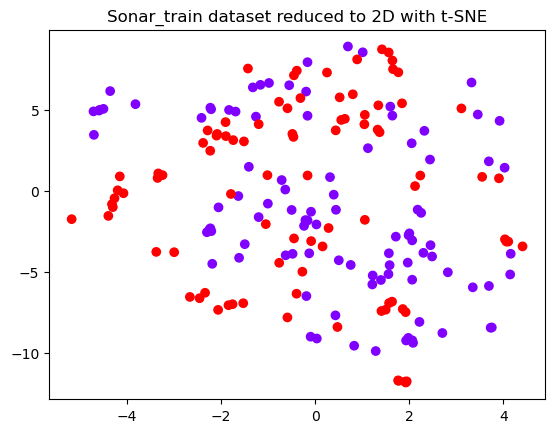

{'perplexity': 100}


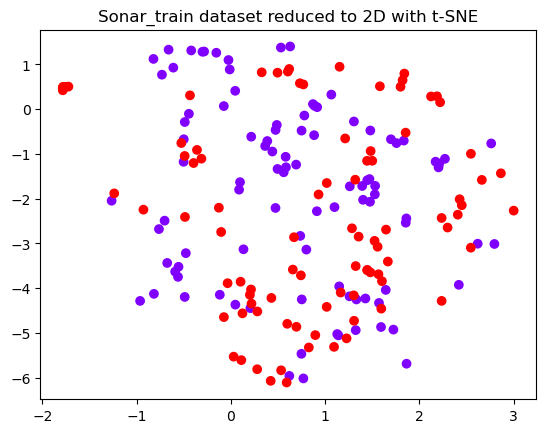

In [23]:
for p in [2,3,5,10,15,20,25,30,50,100]:
    ar = {'perplexity':p}
    print(ar)
    embed(trainX,trainY,ar)

While the spread of samples may change and show areas of higher density of certain perplexity values, there remains no clear separation between R and M.

### Isomap

Isomapping is an older method of manifold learning which attempts to maintain the geodesic distances between points. It first uses a nearest neighbor search, then uses Djikstra's or the Floyd-Warshall algorithm to find the shortest path, before performing partial eigenvalue decomposition.

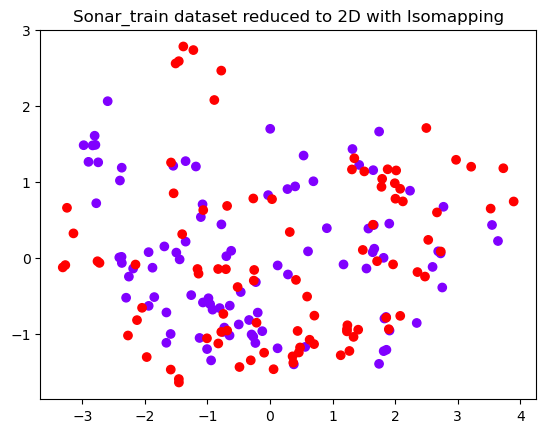

In [25]:
ex, ey = man.Isomap(n_neighbors=10).fit_transform(trainX).transpose()
plt.scatter(ex, ey, c = trainY, cmap = 'rainbow')
plt.title(f'Sonar_train dataset reduced to 2D with Isomapping')
plt.show()

Isomapping the training dataset shows the same pattern as t-SNE.

### MDS (Multidimensional Scaling)

MDS will attempt to reduce the number of dimensions while also respecting the original distances; in metric MDS, similar values will be placed closer to each other.

/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


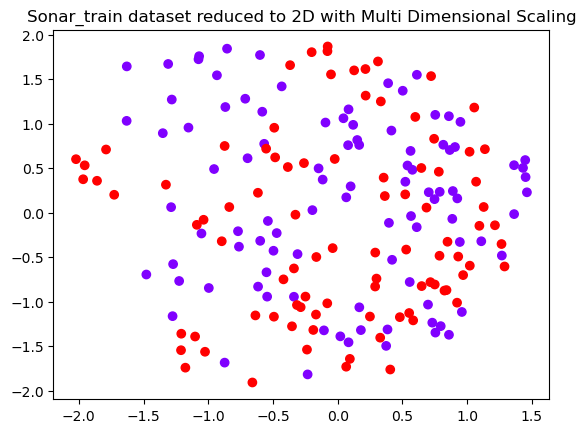

In [28]:
ex, ey = man.MDS().fit_transform(trainX).transpose()
plt.scatter(ex, ey, c = trainY, cmap = 'rainbow')
plt.title(f'Sonar_train dataset reduced to 2D with Multi Dimensional Scaling')
plt.show()

Using MDS on the training dataset shows the same pattern as t-SNE.

### LLE (Locally Linear Embedding)

LLE will try to preserve distances with a sample's closest neighbours.

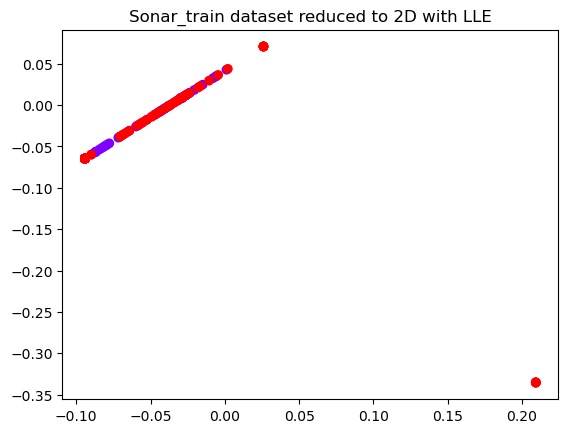

In [29]:
ex, ey = man.LocallyLinearEmbedding().fit_transform(trainX).transpose()
plt.scatter(ex, ey, c = trainY, cmap = 'rainbow')
plt.title(f'Sonar_train dataset reduced to 2D with LLE')
plt.show()

LLE groups all samples except one in a line in the upper left quadrant, whilst one sample is placed in the lower right corner.

Using Manifold Learning did not provide us the desired result; the samples were not separated by label which shows that it is probably not the optimal method to use. Due to this, we must move onto using Neural Networks because no classification method execept possibly k-NN would work on this results.

# Neural Networks

We will use MLPs (Multi-Layer Perceptrons), which is a supervised learning algorithm. In our case, an input layer takes each feature and transforms it layer by layer, applying a non-linear function after each layer, until it reaches the final layer and is transformed to an output. This process is repeated multiple times, updating the weights through backpropagation.

To begin, we will import sklearn.neural_network.MLPClassifier, because we are trying to make a binary classification model.

In [31]:
from sklearn.neural_network import MLPClassifier

Our first model will be a simple model with 1 hidden layer of 100 units. In all of our models, we will use adam for our optimiser because it is computationally efficient and uses intuitive hyperparemeters; the hidden layer activation will be ReLU because it stops negative values and behaves like a linear function.

In [32]:
clf = MLPClassifier().fit(trainX,trainY)

/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
clf.score(testX,testY)

0.75

MLPClassifier has inbuilt metric variables, of which score returns test set accuracy. Our basic model already has 75% test accuracy.

In [34]:
predY = clf.predict(testX)

In [35]:
predY

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [36]:
from sklearn import metrics

We will import sklearn.metrics to allow us to get more metrics and plot confusion matrices.

In [39]:
labels = ['Rock','Mine']

In [40]:
def plotConfusionMatrix(actual,predicted,lab):
    cMatrix = metrics.confusion_matrix(actual,predicted)
    cMDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix=cMatrix, display_labels=lab)
    cMDisplay.plot()
    plt.show()
    
def getMetrics(actual,predicted):
    accuracy = metrics.accuracy_score(actual,predicted)*100
    precision = metrics.precision_score(actual,predicted)*100
    recall = metrics.recall_score(actual,predicted)*100
    specificity = metrics.recall_score(actual,predicted,pos_label=0)*100
    
    print(f'ACCURACY - {accuracy}% of samples accurately predicted')
    print(f'PRECISION - {precision}% of positive predicted samples are positive')
    print(f'RECALL - {recall}% of positive samples were predicted as positive')
    print(f'SPECIFICITY - {specificity}% of negative samples were predicted as negative')

plotConfusionMatrix will visualise the performance of the model so we can see how the model predicts test samples.

getMetrics will give us the values of certain metrics.

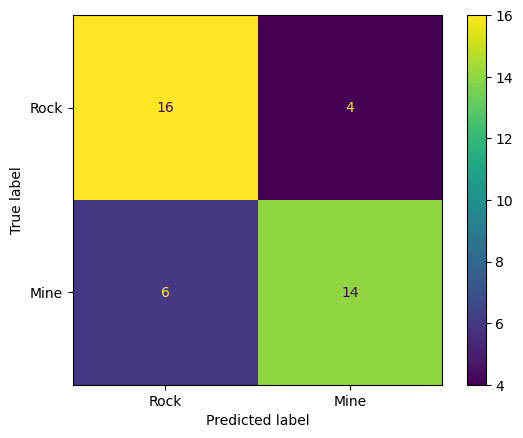

ACCURACY - 75.0% of samples accurately predicted
PRECISION - 77.77777777777779% of positive predicted samples are positive
RECALL - 70.0% of positive samples were predicted as positive
SPECIFICITY - 80.0% of negative samples were predicted as negative


In [41]:
plotConfusionMatrix(testY,predY,labels)
getMetrics(testY,predY)

The confusion matrix shows both classes are correctly predicted at around the same rate.

In [42]:
clf.loss_

0.2645155061833546

In [44]:
clf.best_loss_

0.2645155061833546

clf.loss_ shows us the loss of the network at the end of training; clf.best_loss_ shows the lowest loss obtained during training. These values are the same, so the network performance continued to improve.

In [78]:
layerSizes = [(100),(64),(64,32),(64,32,16),(100,50,25),(64,128,64,32),(64,128,64,32,16),(64,128,256,256,64,32),(64,128,256,512,512,256,64,32),(64,128,256,512,1024,512,256,64,32),(64,128,256,512,1024,1024,512,256,64,32)]


To see if we can improve the performance, I have created an array layerSizes to store each test case. We will create a model to run each structure to evaluate the best layout for this problem.

In [49]:
def runMLPModel(trainSet,testSet,target,modelLayouts,labels):
    trainX, trainY = trainSet.drop(target, axis = 1), trainSet[target]
    testX, testY = testSet.drop(target, axis = 1), testSet[target]
    
    models = {}
    
    for i, structure in enumerate(modelLayouts):
        print(f'Model {i}, structure = {structure}')
        MLPModel = MLPClassifier(hidden_layer_sizes = structure, early_stopping = True).fit(trainX,trainY)
        testYPred = MLPModel.predict(testX)
        
        plotConfusionMatrix(testY,testYPred,labels)
        getMetrics(testY,testYPred)
        
        models[i] = (MLPModel,MLPModel.loss_)
        

runMLPModel takes a training set, testing set, target name, a list of model structures and the target labels. It creates the feature and target sets, then creates a model for each structure and tests it. It than displays the model metrics and appends the model and its loss to a dictionary.

Each model will have early_stopping set to True, so that training stops if validation accuracy stops improving. This will require taking 10% of the training set for validation, roughly 19 samples.

Model 0, structure = 100


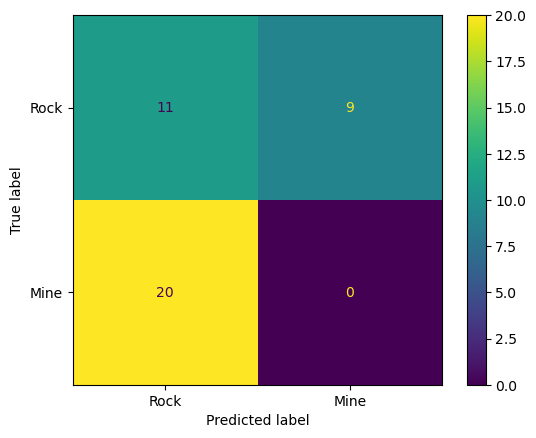

ACCURACY - 27.500000000000004% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 55.00000000000001% of negative samples were predicted as negative
Model 1, structure = 64


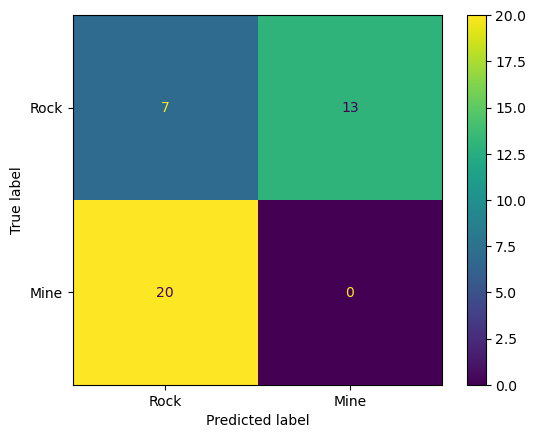

ACCURACY - 17.5% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 35.0% of negative samples were predicted as negative
Model 2, structure = (64, 32)


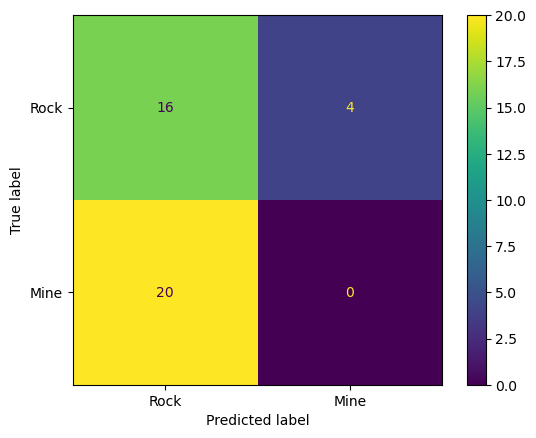

ACCURACY - 40.0% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 80.0% of negative samples were predicted as negative
Model 3, structure = (64, 32, 16)


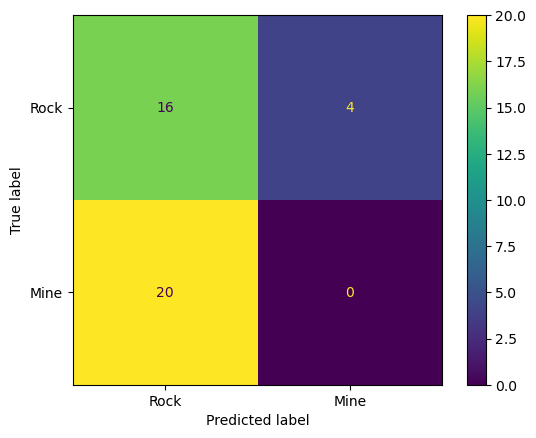

ACCURACY - 40.0% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 80.0% of negative samples were predicted as negative
Model 4, structure = (100, 50, 25)


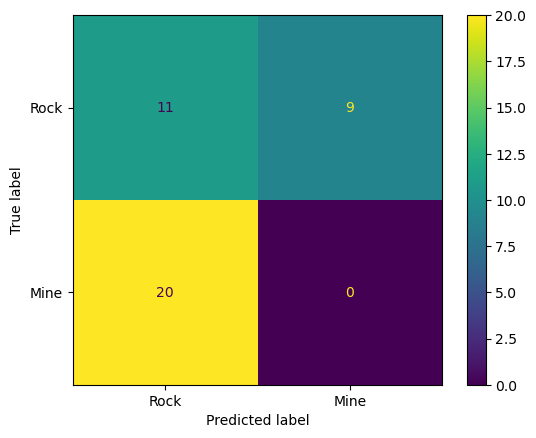

ACCURACY - 27.500000000000004% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 55.00000000000001% of negative samples were predicted as negative
Model 5, structure = (64, 128, 64, 32)


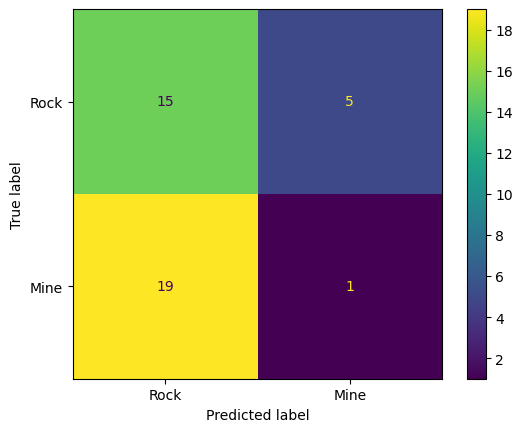

ACCURACY - 40.0% of samples accurately predicted
PRECISION - 16.666666666666664% of positive predicted samples are positive
RECALL - 5.0% of positive samples were predicted as positive
SPECIFICITY - 75.0% of negative samples were predicted as negative
Model 6, structure = (64, 128, 64, 32, 16)


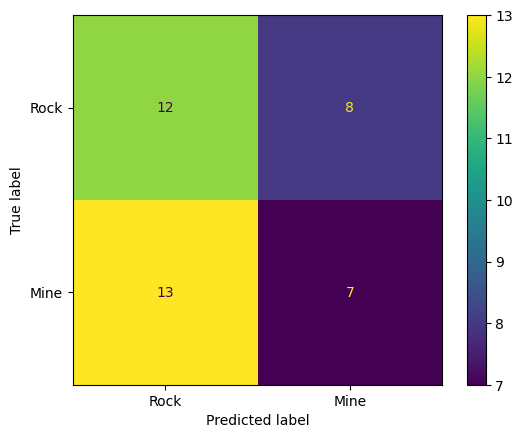

ACCURACY - 47.5% of samples accurately predicted
PRECISION - 46.666666666666664% of positive predicted samples are positive
RECALL - 35.0% of positive samples were predicted as positive
SPECIFICITY - 60.0% of negative samples were predicted as negative
Model 7, structure = (64, 128, 256, 256, 64, 32)


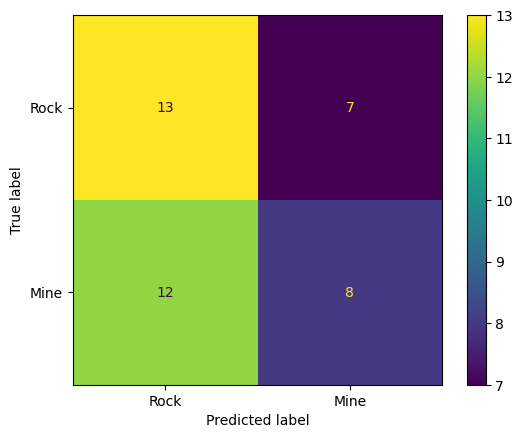

ACCURACY - 52.5% of samples accurately predicted
PRECISION - 53.333333333333336% of positive predicted samples are positive
RECALL - 40.0% of positive samples were predicted as positive
SPECIFICITY - 65.0% of negative samples were predicted as negative
Model 8, structure = (64, 128, 256, 512, 512, 256, 64, 32)


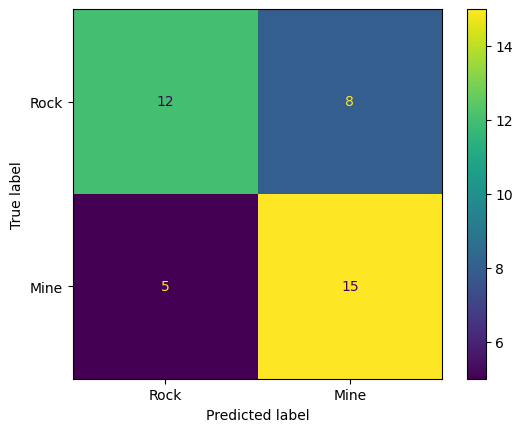

ACCURACY - 67.5% of samples accurately predicted
PRECISION - 65.21739130434783% of positive predicted samples are positive
RECALL - 75.0% of positive samples were predicted as positive
SPECIFICITY - 60.0% of negative samples were predicted as negative
Model 9, structure = (64, 128, 256, 512, 1024, 512, 256, 64, 32)


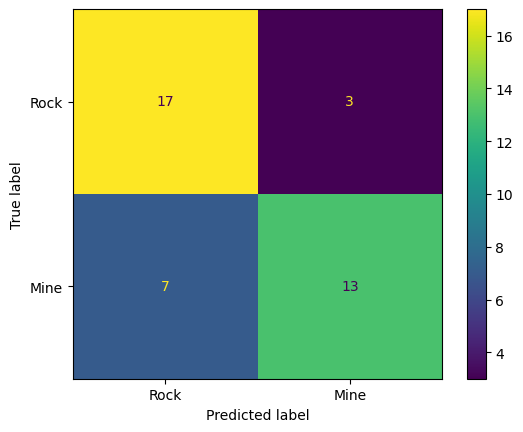

ACCURACY - 75.0% of samples accurately predicted
PRECISION - 81.25% of positive predicted samples are positive
RECALL - 65.0% of positive samples were predicted as positive
SPECIFICITY - 85.0% of negative samples were predicted as negative
Model 10, structure = (64, 128, 256, 512, 1024, 1024, 512, 256, 64, 32)


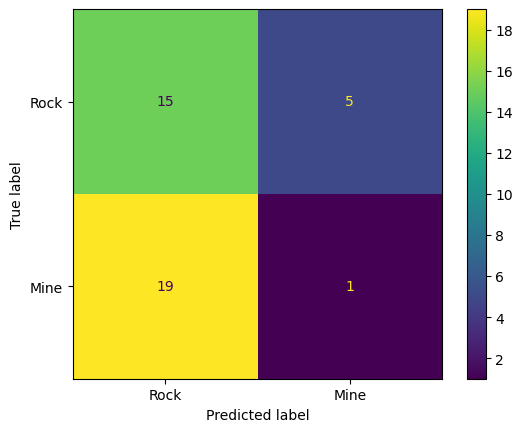

ACCURACY - 40.0% of samples accurately predicted
PRECISION - 16.666666666666664% of positive predicted samples are positive
RECALL - 5.0% of positive samples were predicted as positive
SPECIFICITY - 75.0% of negative samples were predicted as negative


In [50]:
runMLPModel(train,test,'class',layerSizes,labels)

All of these models performed worse than the basic model, perhaps due to overfitting.

In [51]:
def runMLPModel(trainSet,testSet,target,modelLayouts,labels):
    trainX, trainY = trainSet.drop(target, axis = 1), trainSet[target]
    testX, testY = testSet.drop(target, axis = 1), testSet[target]
    
    models = {}
    
    for i, structure in enumerate(modelLayouts):
        print(f'Model {i}, structure = ({structure})')
        MLPModel = MLPClassifier(hidden_layer_sizes = structure, early_stopping = True, max_iter = 500).fit(trainX,trainY)
        testYPred = MLPModel.predict(testX)
        
        plotConfusionMatrix(testY,testYPred,labels)
        getMetrics(testY,testYPred)
        
        models[i] = (MLPModel,MLPModel.loss_)
    
    return models

To potentially improve performance, we will fit the model over more iterations. Additionally, our previous function didn't return the models so that has been fixed.

Model 0, structure = (100)


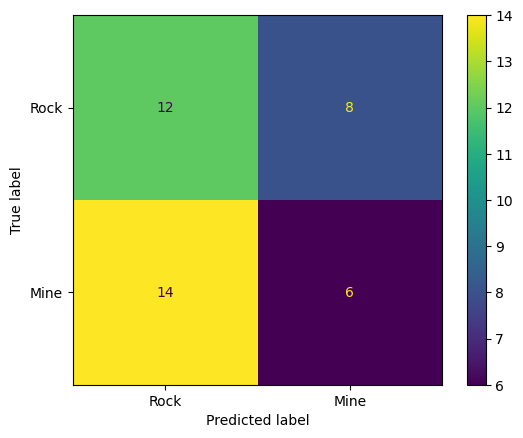

ACCURACY - 45.0% of samples accurately predicted
PRECISION - 42.857142857142854% of positive predicted samples are positive
RECALL - 30.0% of positive samples were predicted as positive
SPECIFICITY - 60.0% of negative samples were predicted as negative
Model 1, structure = (64)


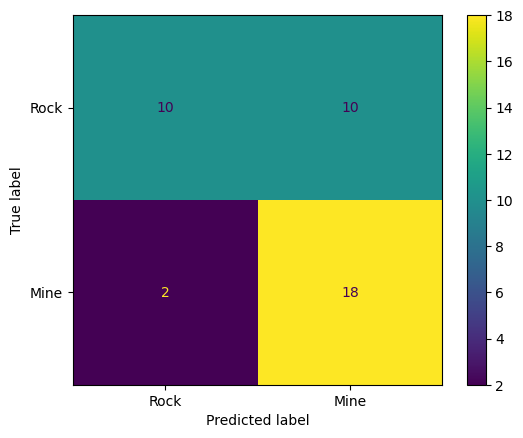

ACCURACY - 70.0% of samples accurately predicted
PRECISION - 64.28571428571429% of positive predicted samples are positive
RECALL - 90.0% of positive samples were predicted as positive
SPECIFICITY - 50.0% of negative samples were predicted as negative
Model 2, structure = ((64, 32))


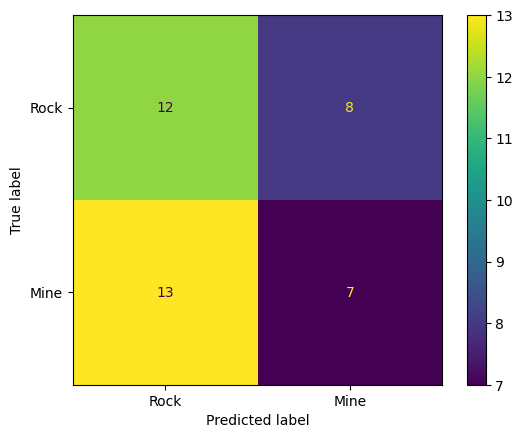

ACCURACY - 47.5% of samples accurately predicted
PRECISION - 46.666666666666664% of positive predicted samples are positive
RECALL - 35.0% of positive samples were predicted as positive
SPECIFICITY - 60.0% of negative samples were predicted as negative
Model 3, structure = ((64, 32, 16))


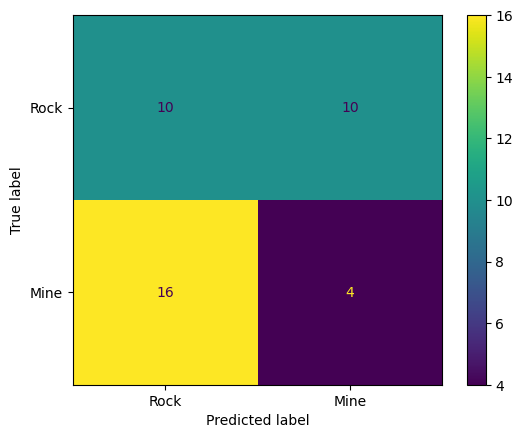

ACCURACY - 35.0% of samples accurately predicted
PRECISION - 28.57142857142857% of positive predicted samples are positive
RECALL - 20.0% of positive samples were predicted as positive
SPECIFICITY - 50.0% of negative samples were predicted as negative
Model 4, structure = ((100, 50, 25))


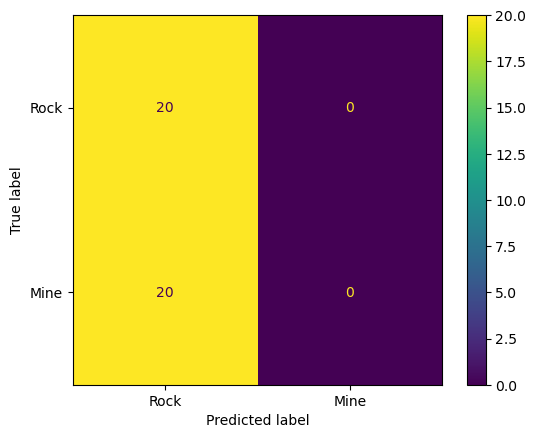

ACCURACY - 50.0% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 5, structure = ((64, 128, 64, 32))


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


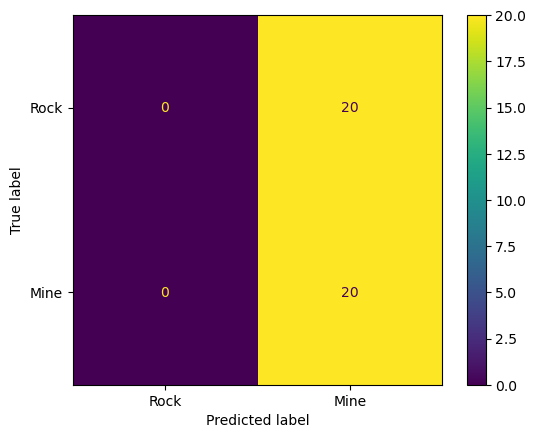

ACCURACY - 50.0% of samples accurately predicted
PRECISION - 50.0% of positive predicted samples are positive
RECALL - 100.0% of positive samples were predicted as positive
SPECIFICITY - 0.0% of negative samples were predicted as negative
Model 6, structure = ((64, 128, 64, 32, 16))


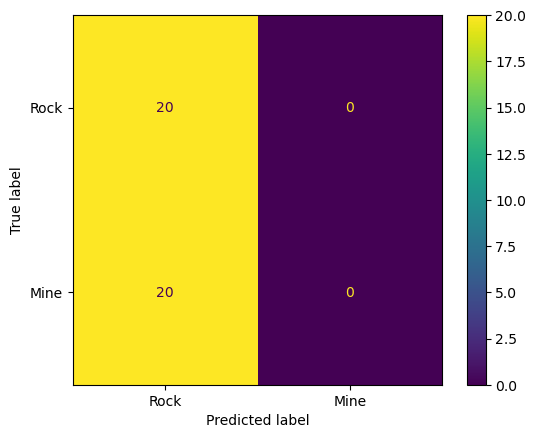

ACCURACY - 50.0% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 7, structure = ((64, 128, 256, 256, 64, 32))


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


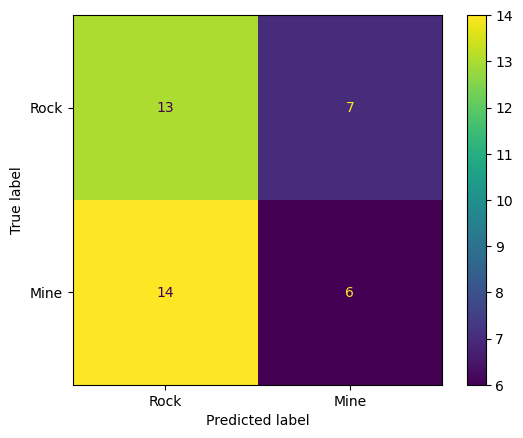

ACCURACY - 47.5% of samples accurately predicted
PRECISION - 46.15384615384615% of positive predicted samples are positive
RECALL - 30.0% of positive samples were predicted as positive
SPECIFICITY - 65.0% of negative samples were predicted as negative
Model 8, structure = ((64, 128, 256, 512, 512, 256, 64, 32))


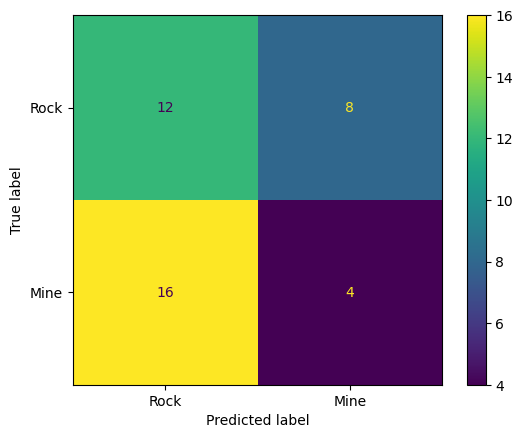

ACCURACY - 40.0% of samples accurately predicted
PRECISION - 33.33333333333333% of positive predicted samples are positive
RECALL - 20.0% of positive samples were predicted as positive
SPECIFICITY - 60.0% of negative samples were predicted as negative
Model 9, structure = ((64, 128, 256, 512, 1024, 512, 256, 64, 32))


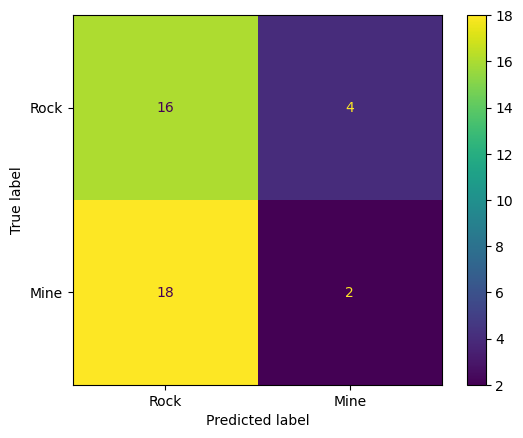

ACCURACY - 45.0% of samples accurately predicted
PRECISION - 33.33333333333333% of positive predicted samples are positive
RECALL - 10.0% of positive samples were predicted as positive
SPECIFICITY - 80.0% of negative samples were predicted as negative
Model 10, structure = ((64, 128, 256, 512, 1024, 1024, 512, 256, 64, 32))


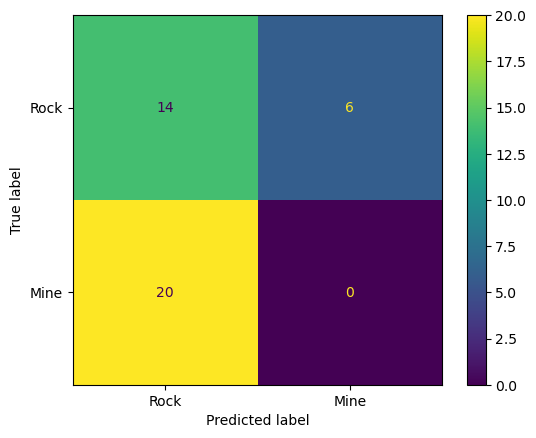

ACCURACY - 35.0% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 70.0% of negative samples were predicted as negative


In [52]:
m1 = runMLPModel(train,test,'class',layerSizes,labels)

These models performed even worse. On multiple occasions, the network was only able to predict one class. These models are very overfitted to the training dataset.

In [53]:
m1

{0: (MLPClassifier(early_stopping=True, hidden_layer_sizes=100, max_iter=500),
  0.6159110608757984),
 1: (MLPClassifier(early_stopping=True, hidden_layer_sizes=64, max_iter=500),
  0.5981546943281841),
 2: (MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 32), max_iter=500),
  0.6005045361203236),
 3: (MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 32, 16),
                max_iter=500),
  0.5486866074409366),
 4: (MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50, 25),
                max_iter=500),
  0.676038785673554),
 5: (MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 128, 64, 32),
                max_iter=500),
  0.6822160147104658),
 6: (MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 128, 64, 32, 16),
                max_iter=500),
  0.6951095295273472),
 7: (MLPClassifier(early_stopping=True,
                hidden_layer_sizes=(64, 128, 256, 256, 64, 32), max_iter=500),
  0.3209007434277878),
 8: (MLPClassifier(early_s

*dictionary m1 containing (model, model loss)*

In [54]:
def runMLPModel(trainSet,testSet,target,modelLayouts,labels):
    trainX, trainY = trainSet.drop(target, axis = 1), trainSet[target]
    testX, testY = testSet.drop(target, axis = 1), testSet[target]
    
    models = {}
    
    for i, structure in enumerate(modelLayouts):
        print(f'Model {i}, structure = ({structure})')
        MLPModel = MLPClassifier(hidden_layer_sizes = structure).fit(trainX,trainY)
        testYPred = MLPModel.predict(testX)
        
        plotConfusionMatrix(testY,testYPred,labels)
        getMetrics(testY,testYPred)
        
        models[i] = (MLPModel,MLPModel.loss_)
    
    return models

To stop overfitting, we will leave everything but the model structure on default values, like clf, which will hopefully mean less overfitting.

Model 0, structure = (100)


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


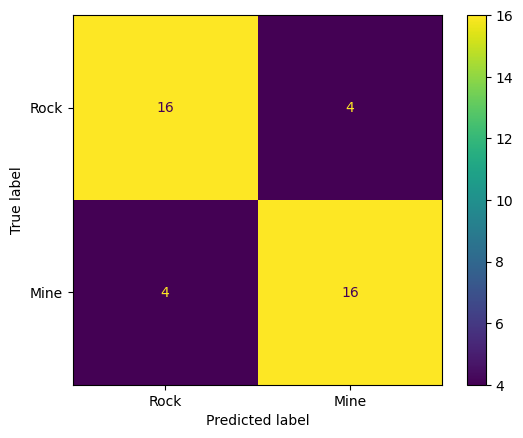

ACCURACY - 80.0% of samples accurately predicted
PRECISION - 80.0% of positive predicted samples are positive
RECALL - 80.0% of positive samples were predicted as positive
SPECIFICITY - 80.0% of negative samples were predicted as negative
Model 1, structure = (64)


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


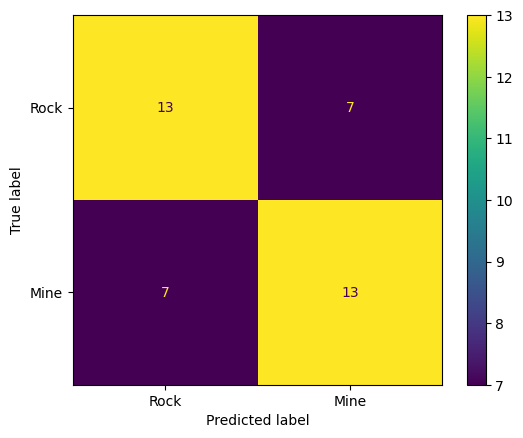

ACCURACY - 65.0% of samples accurately predicted
PRECISION - 65.0% of positive predicted samples are positive
RECALL - 65.0% of positive samples were predicted as positive
SPECIFICITY - 65.0% of negative samples were predicted as negative
Model 2, structure = ((64, 32))


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


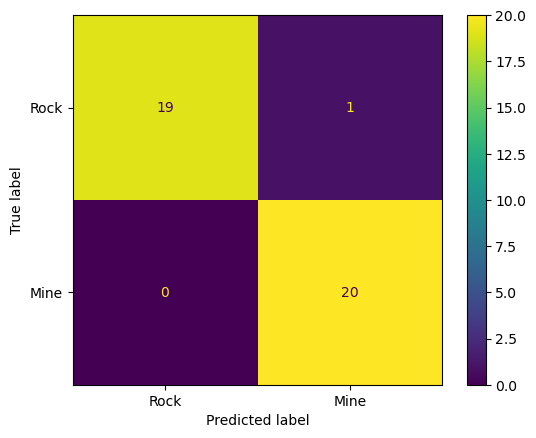

ACCURACY - 97.5% of samples accurately predicted
PRECISION - 95.23809523809523% of positive predicted samples are positive
RECALL - 100.0% of positive samples were predicted as positive
SPECIFICITY - 95.0% of negative samples were predicted as negative
Model 3, structure = ((64, 32, 16))


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


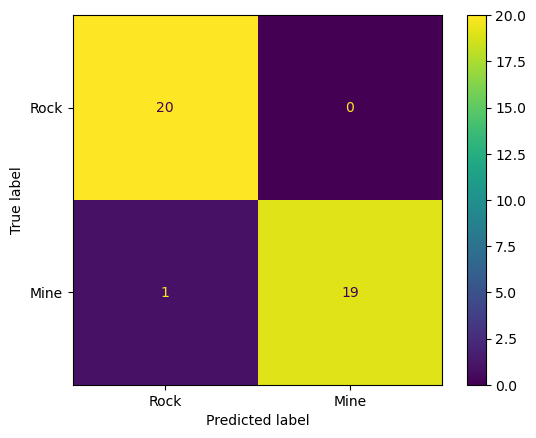

ACCURACY - 97.5% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 95.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 4, structure = ((100, 50, 25))


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


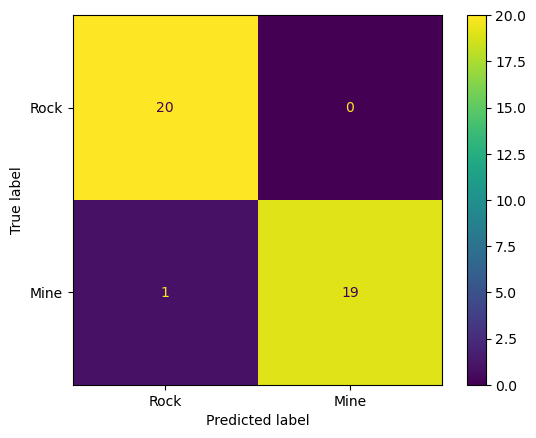

ACCURACY - 97.5% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 95.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 5, structure = ((64, 128, 64, 32))


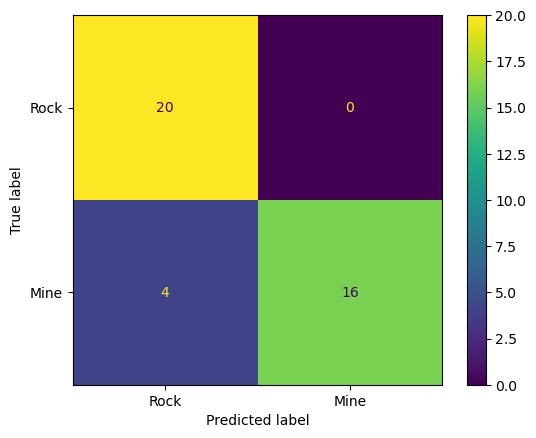

ACCURACY - 90.0% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 80.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 6, structure = ((64, 128, 64, 32, 16))


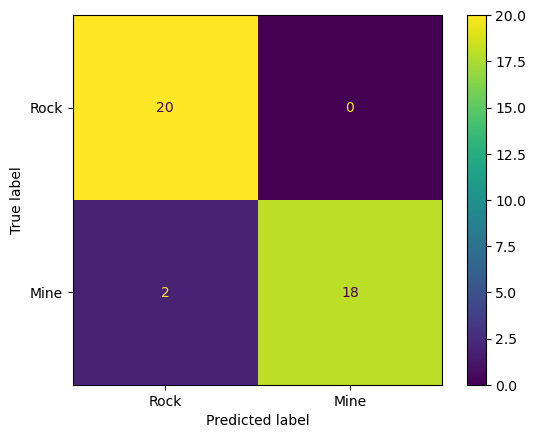

ACCURACY - 95.0% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 90.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 7, structure = ((64, 128, 256, 256, 64, 32))


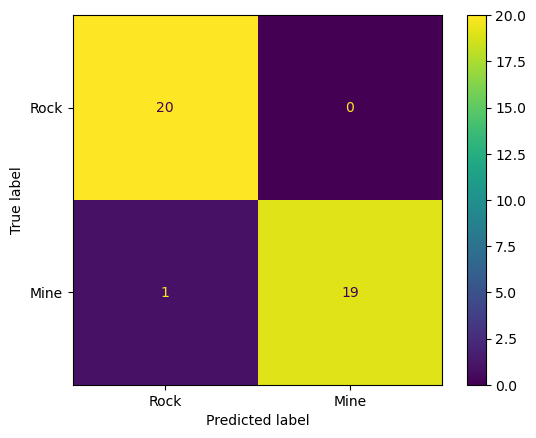

ACCURACY - 97.5% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 95.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 8, structure = ((64, 128, 256, 512, 512, 256, 64, 32))


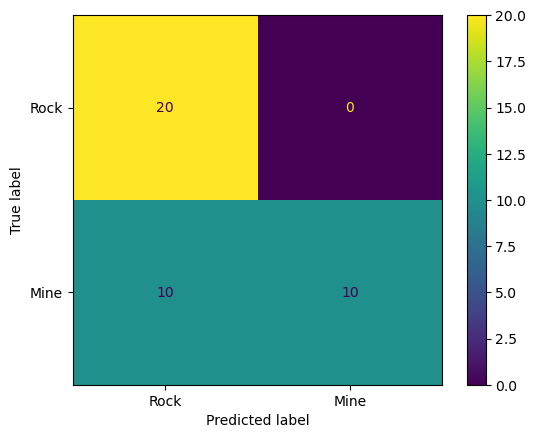

ACCURACY - 75.0% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 50.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 9, structure = ((64, 128, 256, 512, 1024, 512, 256, 64, 32))


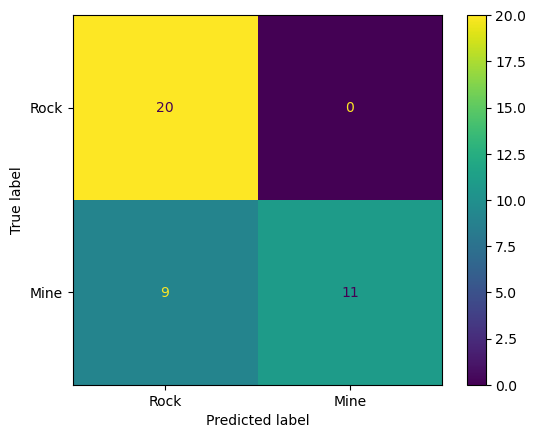

ACCURACY - 77.5% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 55.00000000000001% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
Model 10, structure = ((64, 128, 256, 512, 1024, 1024, 512, 256, 64, 32))


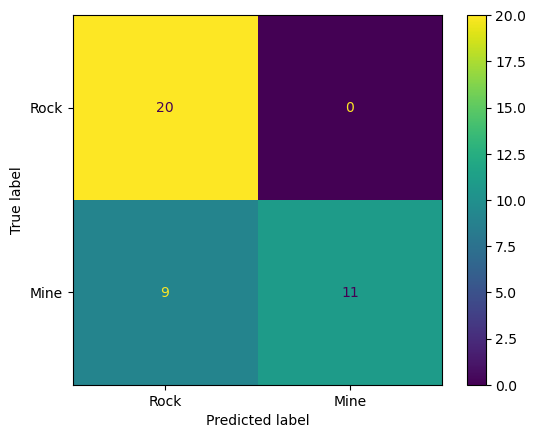

ACCURACY - 77.5% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 55.00000000000001% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


In [55]:
m2 = runMLPModel(train,test,'class',layerSizes,labels)

All of these models performed well, including multiple that correctly predicted almost all test samples. This may be because we ran our models for less iterations, preventing overfitting.

In [56]:
m2

{0: (MLPClassifier(hidden_layer_sizes=100), 0.2786649309799525),
 1: (MLPClassifier(hidden_layer_sizes=64), 0.3670393713092842),
 2: (MLPClassifier(hidden_layer_sizes=(64, 32)), 0.09922994770875819),
 3: (MLPClassifier(hidden_layer_sizes=(64, 32, 16)), 0.019123949607491652),
 4: (MLPClassifier(hidden_layer_sizes=(100, 50, 25)), 0.0041930328280818056),
 5: (MLPClassifier(hidden_layer_sizes=(64, 128, 64, 32)),
  0.0020633896358375446),
 6: (MLPClassifier(hidden_layer_sizes=(64, 128, 64, 32, 16)),
  0.0015837112836532715),
 7: (MLPClassifier(hidden_layer_sizes=(64, 128, 256, 256, 64, 32)),
  0.0007943396718195228),
 8: (MLPClassifier(hidden_layer_sizes=(64, 128, 256, 512, 512, 256, 64, 32)),
  0.0006036733214943035),
 9: (MLPClassifier(hidden_layer_sizes=(64, 128, 256, 512, 1024, 512, 256, 64, 32)),
  0.016991168667981397),
 10: (MLPClassifier(hidden_layer_sizes=(64, 128, 256, 512, 1024, 1024, 512, 256, 64,
                                    32)),
  0.0007398778943812945)}

*dictionary m2 containing (model, model loss)*

The testing losses in the best models were very low, inlcuding some below 0.001.

To further test our m2 models, we can use newObject - an unlabelled sample - on a selection of models.

In [59]:
newObject = pd.read_csv('data/new_object.csv')
newObject

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59
0,0.026,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.14,0.1843,0.2354,...,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.004,0.0036,0.0061,0.0115


*newObject - unlabelled object*

In [60]:
chosenModels = [m2[i][0] for i in [2,3,4,6,7]]

In [61]:
chosenModels

[MLPClassifier(hidden_layer_sizes=(64, 32)),
 MLPClassifier(hidden_layer_sizes=(64, 32, 16)),
 MLPClassifier(hidden_layer_sizes=(100, 50, 25)),
 MLPClassifier(hidden_layer_sizes=(64, 128, 64, 32, 16)),
 MLPClassifier(hidden_layer_sizes=(64, 128, 256, 256, 64, 32))]

To classify newObject, we will take the best performing models, which are models 2,3,4,6 and 7. These were decided by the confusion matrices above.

In [64]:
newObjectPred = [m.predict(newObject)[0] for m in chosenModels]

In [65]:
newObjectPred

[1, 0, 0, 0, 0]

newObjectPred contains the prediction for newObject by every model in chosenModels. We can see that all models except model 2 predicted the object as a rock, showing most of these models are consistent.

In [70]:
newObjectLabels = [labels[m] for m in newObjectPred]
newObjectLabels

['Mine', 'Rock', 'Rock', 'Rock', 'Rock']

By using list comprehension, we can see the label of each prediction.

# Conclusion

We were unable to use manifold learning to help us create a classification model; no clear distinction between samples labelled as Rocks or Mines was shown using any manifold learning technique.

On the other hand, we created several models that were very accurate using MLPs. These models had testing accuracies above 95% and losses below 0.001 and were consistent in labelling the unknown object.